In [11]:
a, b, c = ([] for _ in range(3))
print(a, b, c)

[] [] []


[(11, 20), (13, 21), (12, 23), (10, 22)]
([11, 13, 12, 10], [20, 21, 23, 22])


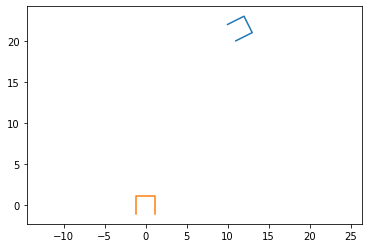

In [14]:
import numpy as np
from endtoend_env_utils import shift_and_rotate_coordination

import matplotlib.pyplot as plt
%matplotlib inline

def points2line(points, close=False):
    x_list = []
    y_list = []
    for p in points:
        x_list.append(p[0])
        y_list.append(p[1])
    if close:
        x_list.append(points[0][0])
        y_list.append(points[0][1])
    return x_list, y_list

def line2points(x_list, y_list, close=False):
    points = []
    for x, y in zip(x_list, y_list):
        points.append((x, y))

    if close:
        return points[:-1]
    else:
        return points

cross_shape_x = [11, 13, 12, 10]
cross_shape_y = [20, 21, 23, 22]

points = line2points(cross_shape_x, cross_shape_y)
print(points)

line = points2line(points)
print(line)

plt.plot(cross_shape_x, cross_shape_y)
plt.axis('equal')

center_x = 11.5
center_y = 21.5

angle = np.arctan2(cross_shape_y[1] - cross_shape_y[0],
           cross_shape_x[1] - cross_shape_x[0]) * 180 / np.pi
points_new = []

for p in points:
    x, y, _ = shift_and_rotate_coordination(p[0], p[1], 0, center_x, center_y, -90 + angle) # 注意此处是顺时针旋转
    points_new.append((x, y))

line_new_x, line_new_y = points2line(points_new)
plt.plot(line_new_x, line_new_y)

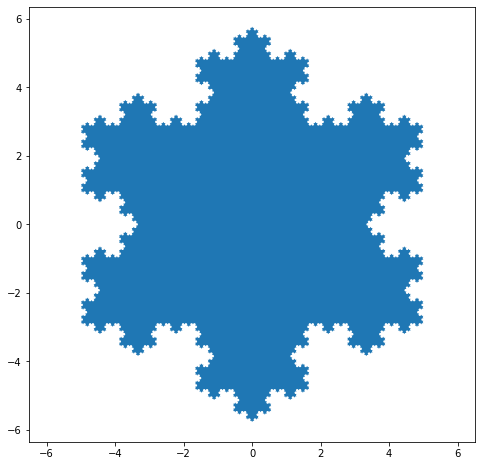

3.53525079574969e-16 0.020576131687243156


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

x, y = koch_snowflake(order=5)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()

print(x[0], x[-1])

(5, 10)
(0.8944271909999159, -0.4472135954999579)


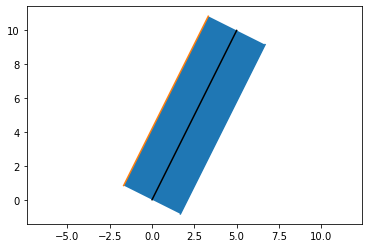

In [9]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

A, B = (0, 0), (5, 10)
width = 3.75
AB = (B[0] - A[0], B[1] - A[1])
ABL = math.sqrt(AB[0] * AB[0] + AB[1] * AB[1])
print(AB)

k = (AB[1] / ABL, -AB[0] / ABL)
print(k)
a1 =(A[0] + k[0] * width / 2, A[1] + k[1] * width / 2)
a2 =(B[0] + k[0] * width / 2, B[1] + k[1] * width / 2)
a3 =(A[0] - k[0] * width / 2, A[1] - k[1] * width / 2)
a4 =(B[0] - k[0] * width / 2, B[1] - k[1] * width / 2)

def points2line(points, close=False):
    x_list = []
    y_list = []
    for p in points:
        x_list.append(p[0])
        y_list.append(p[1])
    if close:
        x_list.append(points[0][0])
        y_list.append(points[0][1])
    return x_list, y_list

x_list, y_list = points2line((a1, a2))
plt.plot(x_list, y_list)

x_list, y_list = points2line((a3, a4))
plt.plot(x_list, y_list)

x_list, y_list = points2line((A, B))
plt.plot(x_list, y_list, 'k')
plt.axis('equal')

x_list, y_list = points2line((a1, a2, a4, a3))
plt.fill(x_list, y_list, )



True
True
False
[False  True  True]


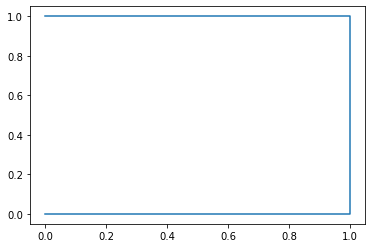

In [10]:
from matplotlib.path import Path
import matplotlib.pyplot as plt
%matplotlib inline
from endtoend_env_utils import points2line
import numpy as np
area = [(0, 0), (1, 0), (1, 1), (0, 1)]

plt.plot(*points2line(area))
# plt.show()
path_area = Path(area)

print(path_area.contains_point([.5, .5]))

print(path_area.contains_point([.5, 1]))

print(path_area.contains_point([2, 2]))

print(path_area.contains_points([[2, 2], [.5, 1], [.5, .5]]))